<a href="https://colab.research.google.com/github/pegahahadian/pHBrain/blob/main/BrainPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from plotly.offline import iplot
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy as sp
import os
import re
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler

In [73]:
from google.colab import files 
uploaded = files.upload()

Saving BrainpH.csv to BrainpH (1).csv


In [74]:
import pandas as pd 
import io 

# df = pd.read_csv(io.BytesIO(uploaded['BrainpH.csv'])) 
df = pd.read_csv('BrainpH.csv') 
df.head(20)

,Unnamed: 0,pH,Sex,Ethnicity,Age,DeathType
0,1,7.13,M,Caucasian,64,Cardiac
1,2,6.50,M,Caucasian,63,Cardiac
2,3,6.40,M,AfricanAmerican,59,Cardiac
3,4,6.53,M,Caucasian,52,Cardiac
4,5,6.58,M,Caucasian,58,Cardiac
5,6,6.63,M,Caucasian,78,Other
6,7,7.11,F,Caucasian,62,Other
7,8,7.04,M,Caucasian,32,Other
8,9,7.00,M,Caucasian,79,Cardiac
9,10,7.15,M,Caucasian,30,Cardiac


In [4]:
df.describe()


,Unnamed: 0,pH,Age
count,54.000000,54.000000,54.000000
mean,27.500000,6.866296,55.870370
std,15.732133,0.232836,14.068627
min,1.000000,6.300000,18.000000
25%,14.250000,6.650000,45.000000
50%,27.500000,6.885000,57.000000
75%,40.750000,7.037500,66.750000
max,54.000000,7.250000,79.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54 non-null     int64  
 1   pH          54 non-null     float64
 2   Sex         54 non-null     object 
 3   Ethnicity   54 non-null     object 
 4   Age         54 non-null     int64  
 5   DeathType   54 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ KB


In [36]:
df.dtypes

Unnamed: 0      int64
pH            float64
Sex            object
Ethnicity      object
Age             int64
DeathType     float64
dtype: object

In [34]:
df["pH"]= df.groupby("DeathType").pH.tail(1)

In [35]:
df.groupby("DeathType")["pH"].mean().sort_values(ascending= False).head(20)

DeathType
6.83    6.83
6.76    6.76
Name: pH, dtype: float64

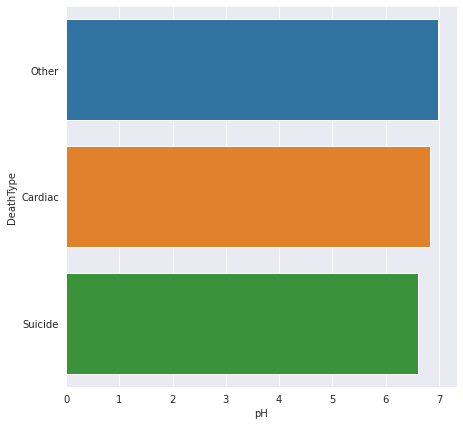

In [38]:
#barplot visualization 
x= df.groupby("DeathType")["pH"].mean().sort_values(ascending= False).head(10)
sns.set_style("darkgrid")
plt.figure(figsize= (7,7))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("pH")
ax.set_ylabel("DeathType")
plt.show()

In [47]:
df["pH"]= df.groupby("Sex").pH.tail(1)
df.groupby("Sex")["pH"].mean().sort_values(ascending= False).head(20)

Sex
M    6.76
F     NaN
Name: pH, dtype: float64

In [49]:
x=df.Ethnicity.unique()
y= list(x)
for i in y: print(i)

Caucasian
AfricanAmerican
Asian
PacificIslander


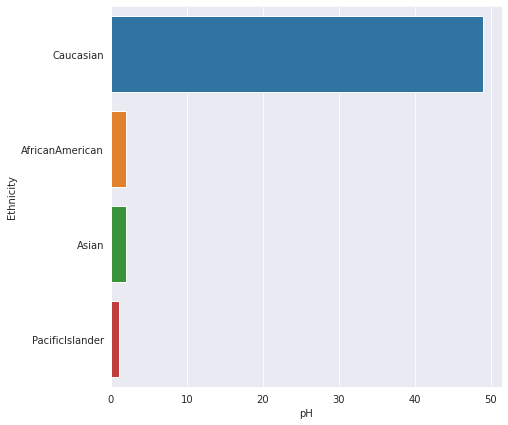

In [50]:
plt.figure(figsize=(7,7))
sns.countplot(y= "Ethnicity",data= df)
plt.ylabel("Ethnicity")
plt.xlabel("pH")
plt.show()

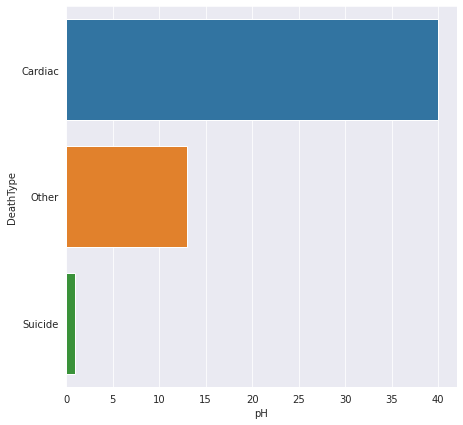

In [51]:
plt.figure(figsize=(7,7))
sns.countplot(y= "DeathType",data= df)
plt.ylabel("DeathType")
plt.xlabel("pH")
plt.show()

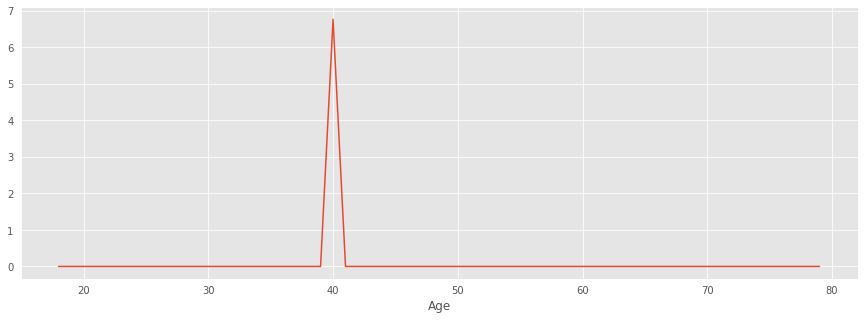

In [62]:
x= df.groupby("Age").pH.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Age")
plt.show()

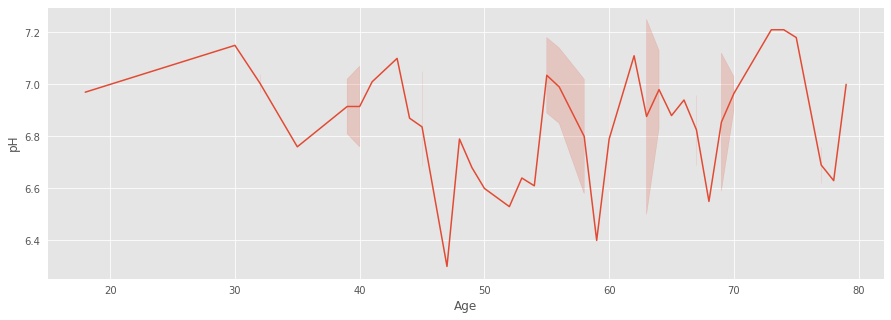

In [75]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "Age",y= "pH",data= df)
plt.xlabel("Age")
plt.ylabel("pH")
plt.show()

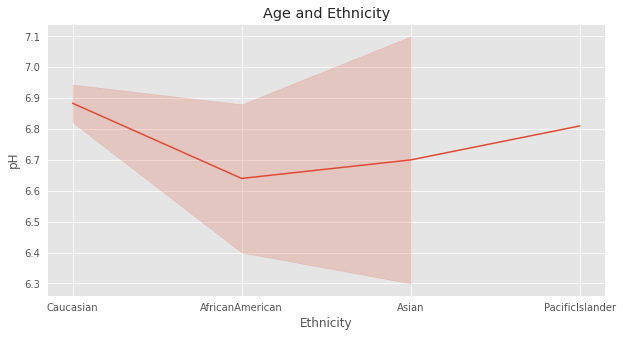

In [78]:
plt.figure(figsize= (10,5))
plt.style.use("ggplot")
sns.lineplot(x= "Ethnicity",y= "pH",data= df)
plt.title("Age and Ethnicity")
plt.ylabel("pH")
plt.xlabel("Ethnicity")
plt.show()

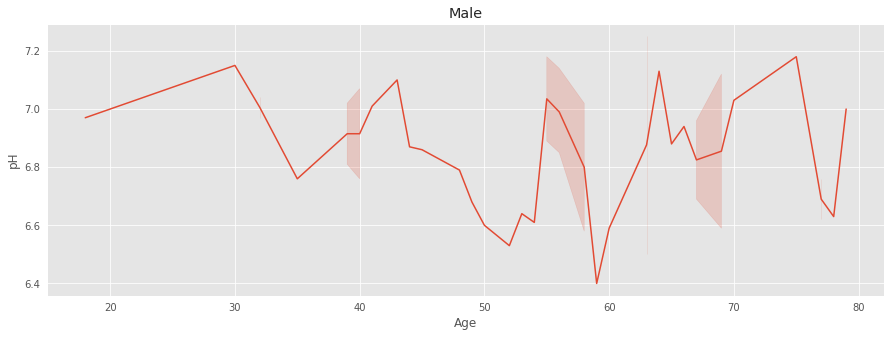

In [80]:
plt.figure(figsize= (15,5))
plt.xlabel("Age")
plt.ylabel("pH")
plt.title("Male")
sns.lineplot(x= "Age",y= "pH",data= df[df.Sex== "M"])
plt.show()

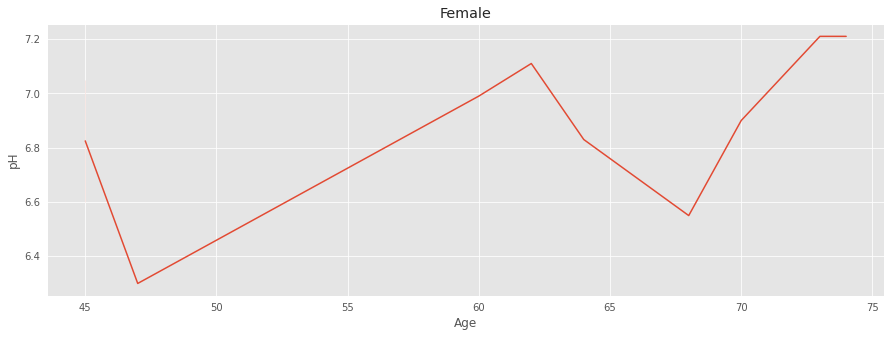

In [79]:
plt.figure(figsize= (15,5))
plt.xlabel("Age")
plt.ylabel("pH")
plt.title("Female")
sns.lineplot(x= "Age",y= "pH",data= df[df.Sex== "F"])
plt.show()

In [81]:
x= df[df["Ethnicity"]=="Asian"]
z= x.pH.value_counts()
c= list(z.index)
c

[6.3, 7.1]

In [82]:
x= df.loc[(df.Ethnicity== "AfricanAmerican") | (df.Ethnicity== "Asian")| (df.Ethnicity== "Caucasian")| (df.Ethnicity== "PacificIslander")]

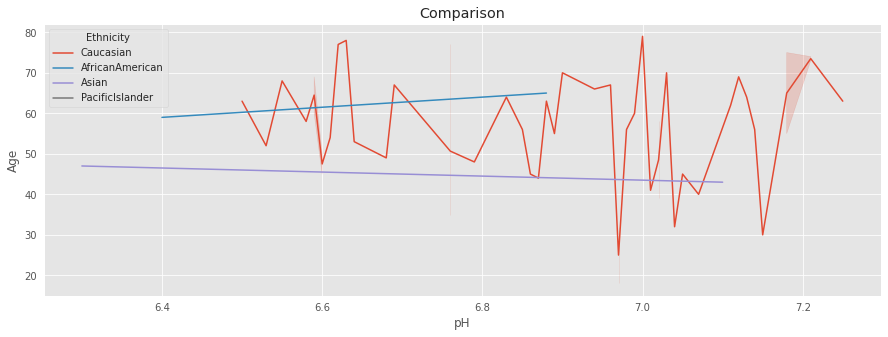

In [85]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "pH",y= "Age" ,data= x,hue= "Ethnicity")
plt.xlabel("pH")
plt.title("Comparison")
plt.show()

In [ ]:
x= df.loc[(df.Sex== "M") | (df.Sex== "F")]

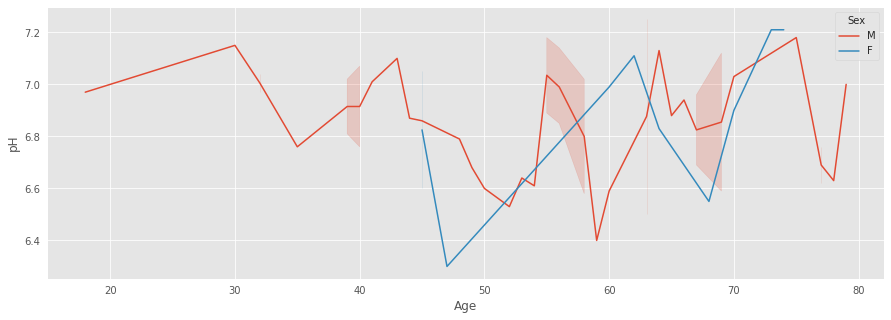

In [87]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "Age",y= "pH" ,data= x,hue= "Sex")
plt.show()

In [88]:
# ClusteringL
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from plotly.offline import iplot
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy as sp
import os
import re
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler

In [89]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [90]:
df.isnull().sum()
df = df.fillna(0)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  54 non-null     int64  
 1   pH          54 non-null     float64
 2   Sex         54 non-null     object 
 3   Ethnicity   54 non-null     object 
 4   Age         54 non-null     int64  
 5   DeathType   54 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.7+ KB


In [95]:
df2 = df
df2.drop(columns=['Sex','Ethnicity','DeathType'],inplace=True)

In [96]:
data=df2.iloc[:,:]
data

,Unnamed: 0,pH,Age
0,1,7.13,64
1,2,6.50,63
2,3,6.40,59
3,4,6.53,52
4,5,6.58,58
5,6,6.63,78
6,7,7.11,62
7,8,7.04,32
8,9,7.00,79
9,10,7.15,30


In [99]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = None) 
data = pca.fit_transform(data) 
explained_variance = pca.explained_variance_ratio_


explained_variance

array([6.85052349e-01, 3.14826422e-01, 1.21229184e-04])

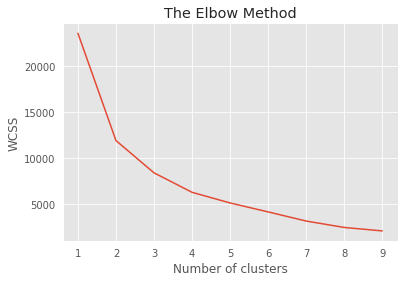

In [100]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

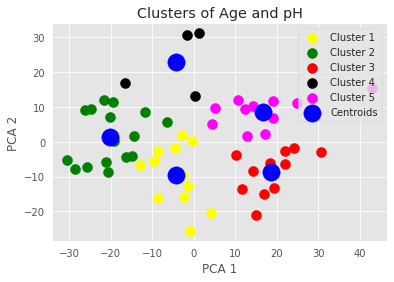

In [101]:
#kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(data)

# Visualising the clusters
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'blue', label = 'Centroids')
plt.title('Clusters of Age and pH')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()